<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/week3_day4_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Tasks
1. Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis with NumPy and SciPy:
Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization with Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis and Conclusion:
Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.


📖 Useful Resources
Download the train dataset from this repository, it comes from the Mobile Price Classification Dataset

Check out this page to understand the attributes | Noise-Resilient Mobile Price Classification



Project Submission
Submit the following in a GitHub repository:

Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
Clean, well-commented Python code.
Distinct headings for each analysis phase.
In-depth comments elucidating findings and the importance of each analytical step.


Pro Tips
Individually examine each feature to grasp its unique traits and influence.
Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
Reference course materials for guidance on complex statistical functions and their practical uses.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files

uploaded = files.upload()


plt.rcParams['figure.figsize'] = (9, 5)

path = "train.csv"
df = pd.read_csv(path)

print("Shape:", df.shape)
print("Dtypes:")
print(df.dtypes)


target = "price_range" if "price_range" in df.columns else None
features = [c for c in df.columns if c != target] if target else list(df.columns)

print("\nTarget:", target)
print("Features:", features)


display(df.head())
display(df.describe(include='all'))


Saving train.csv to train (1).csv
Shape: (2000, 21)
Dtypes:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Target: price_range
Features: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
# === Missing values check ===
print("Missing values per column:\n", df.isna().sum())

num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

target = "price_range" if "price_range" in df.columns else None
cat_cols = [c for c in df.columns if (not pd.api.types.is_numeric_dtype(df[c])) and c != target]

if cat_cols:
    print("Categorical columns found:", cat_cols)
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
else:
    print("No categorical columns found.")

print("\nAfter cleaning -> shape:", df.shape)
print("Any NaNs left?", df.isna().any().any())

Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
No categorical columns found.

After cleaning -> shape: (2000, 21)
Any NaNs left? False


In [5]:
from scipy import stats

def feature_stats(series: pd.Series):
    s = series.dropna()
    mode_val = s.mode().iloc[0] if not s.mode().empty else np.nan
    return {
        "mean": np.mean(s) if len(s) else np.nan,
        "median": np.median(s) if len(s) else np.nan,
        "mode": mode_val,
        "min": np.min(s) if len(s) else np.nan,
        "max": np.max(s) if len(s) else np.nan,
        "range": (np.max(s) - np.min(s)) if len(s) else np.nan,
        "variance": np.var(s, ddof=1) if len(s) > 1 else np.nan,
        "std": np.std(s, ddof=1) if len(s) > 1 else np.nan,
        "skewness": stats.skew(s, nan_policy="omit") if len(s) > 2 else np.nan,
        "kurtosis": stats.kurtosis(s, fisher=True, nan_policy="omit") if len(s) > 3 else np.nan
    }


num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != target]


summary_rows = []
for col in num_cols:
    summary_rows.append(pd.Series(feature_stats(df[col]), name=col))

stats_df = pd.DataFrame(summary_rows)
display(stats_df)


,mean,median,mode,min,max,range,variance,std,skewness,kurtosis
battery_power,1238.51850,1226.0,618.0,501.0,1998.0,1497.0,1.930884e+05,439.418206,0.031875,-1.224084
blue,0.49500,0.0,0.0,0.0,1.0,1.0,2.501001e-01,0.500100,0.020001,-1.999600
clock_speed,1.52225,1.5,0.5,0.5,3.0,2.5,6.658629e-01,0.816004,0.177951,-1.323109
dual_sim,0.50950,1.0,1.0,0.0,1.0,1.0,2.500348e-01,0.500035,-0.038007,-1.998555
fc,4.30950,3.0,0.0,0.0,19.0,19.0,1.884813e+01,4.341444,1.019046,0.273386
four_g,0.52150,1.0,1.0,0.0,1.0,1.0,2.496626e-01,0.499662,-0.086080,-1.992590
int_memory,32.04650,32.0,27.0,2.0,64.0,62.0,3.292670e+02,18.145715,0.057846,-1.216034
m_dep,0.50175,0.5,0.1,0.1,1.0,0.9,8.318353e-02,0.288416,0.089015,-1.274164
mobile_wt,140.24900,141.0,182.0,80.0,200.0,120.0,1.253136e+03,35.399655,0.006553,-1.210351
n_cores,4.52050,4.0,4.0,1.0,8.0,7.0,5.234197e+00,2.287837,0.003625,-1.229676


In [6]:
from scipy import stats

if target and pd.api.types.is_numeric_dtype(df[target]):
    groups = sorted(df[target].dropna().unique())
    print("Target groups:", groups)

    results = []
    for col in num_cols:

        samples = [df.loc[df[target] == g, col].dropna().values for g in groups]
        valid_groups = [s for s in samples if len(s) > 5]

        if len(valid_groups) >= 2:
            F, p = stats.f_oneway(*valid_groups)
            results.append((col, F, p))


    anova_df = pd.DataFrame(results, columns=["feature", "F_stat", "p_value"]).sort_values("p_value")
    print("\nANOVA results (features sorted by p-value):")
    display(anova_df.head(15))
else:
    print(" Target 'price_range' is not numeric discret or is missing.")


Target groups: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

ANOVA results (features sorted by p-value):


,feature,F_stat,p_value
13,ram,3520.110824,0.000000e+00
0,battery_power,31.598158,5.948688e-20
12,px_width,22.620882,2.116911e-14
11,px_height,19.484842,1.886085e-12
8,mobile_wt,3.594318,1.311739e-02
6,int_memory,2.922996,3.277694e-02
9,n_cores,2.625415,4.893585e-02
14,sc_h,2.225984,8.324991e-02
15,sc_w,1.671000,1.712146e-01
16,talk_time,1.628811,1.806686e-01



Correlation matrix (numerical features): shape (21, 21)


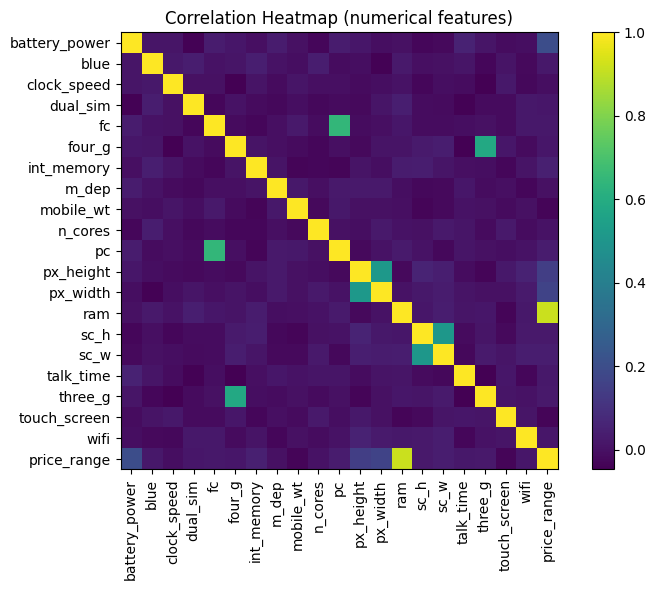

In [7]:
corr_matrix = df[num_cols + ([target] if target and target in df.columns else [])].corr()
print("\nCorrelation matrix (numerical features): shape", corr_matrix.shape)

# Heatmap simplu
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, interpolation='nearest')
plt.title("Correlation Heatmap (numerical features)")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.tight_layout()
plt.show()

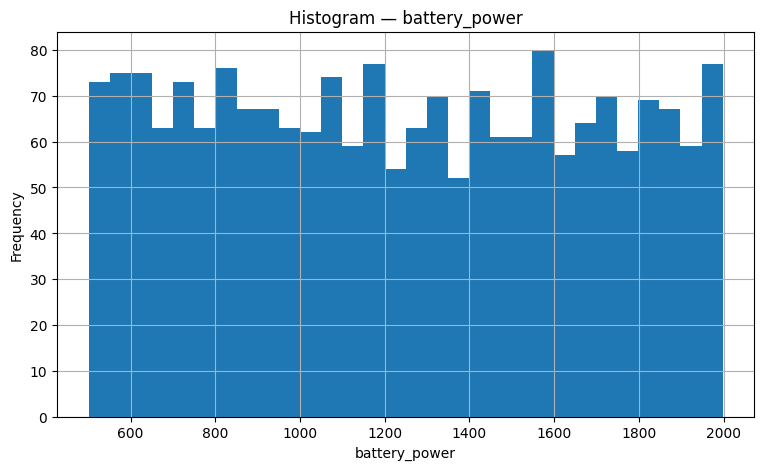

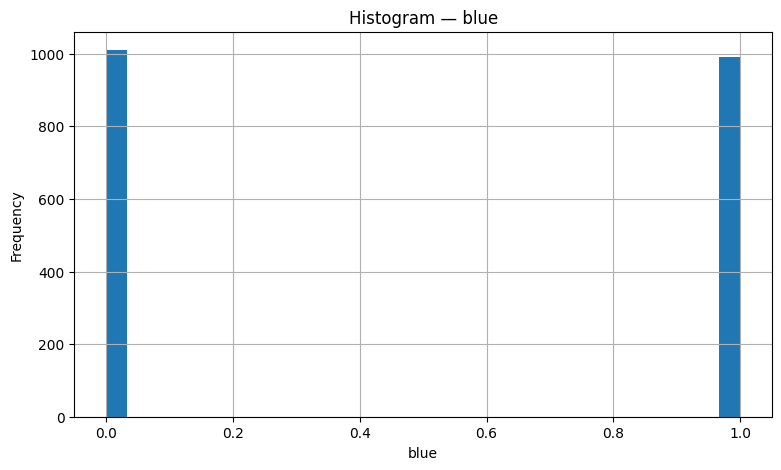

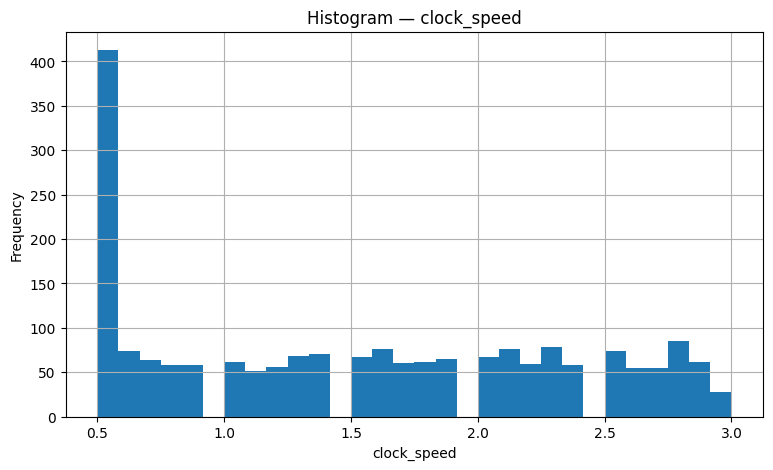

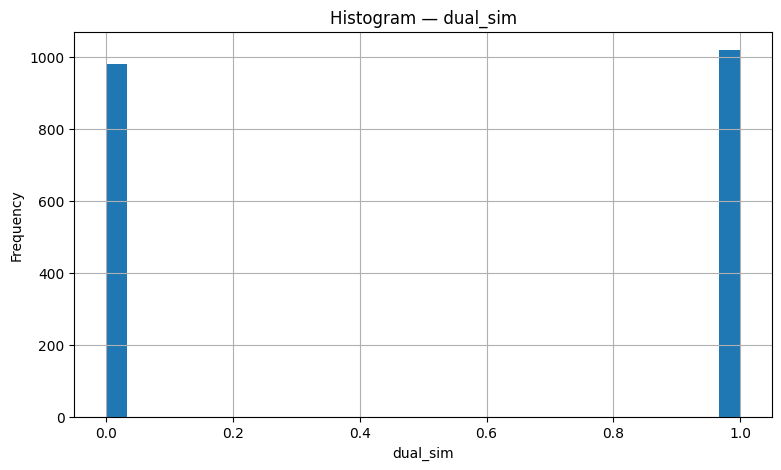

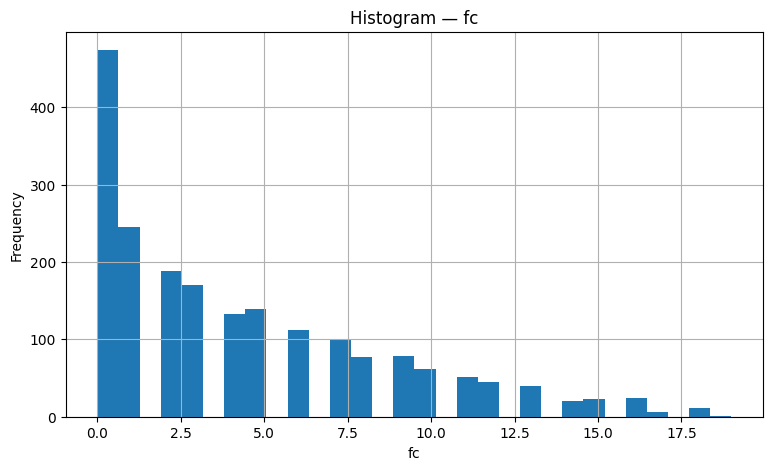

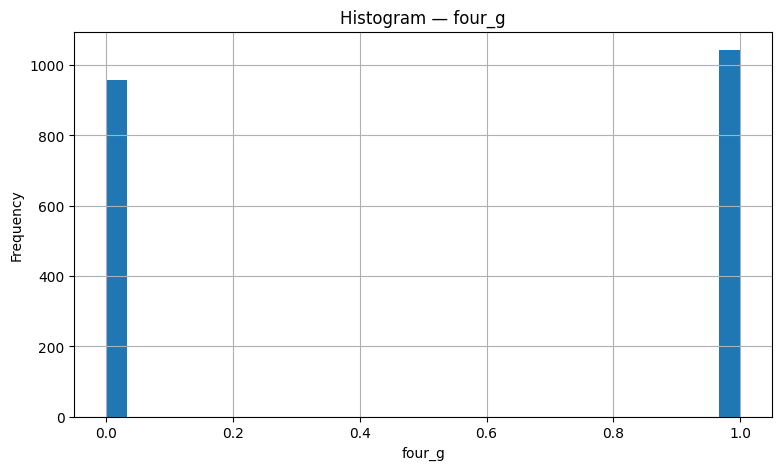

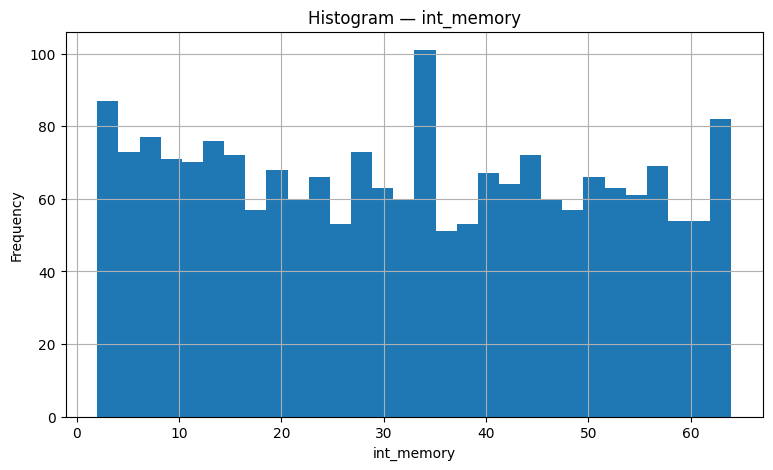

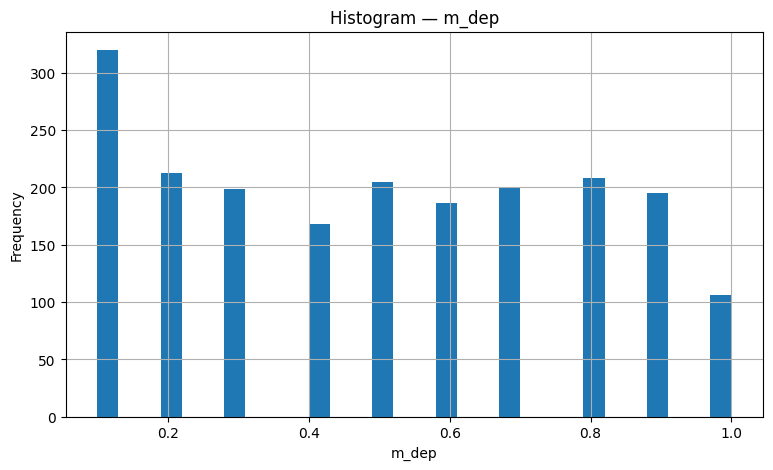

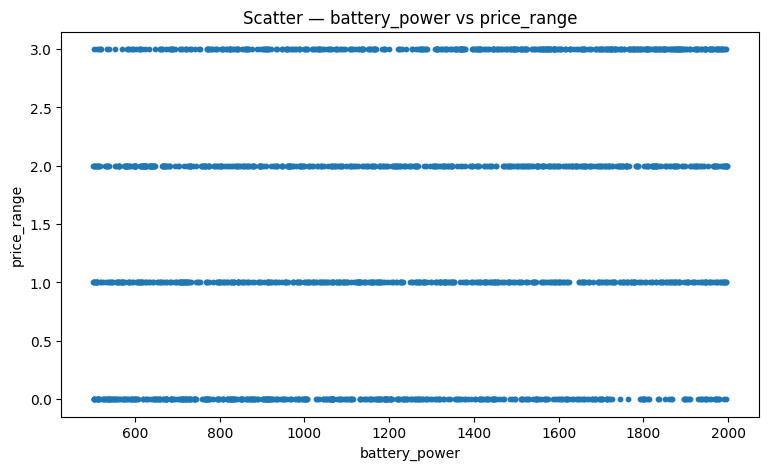

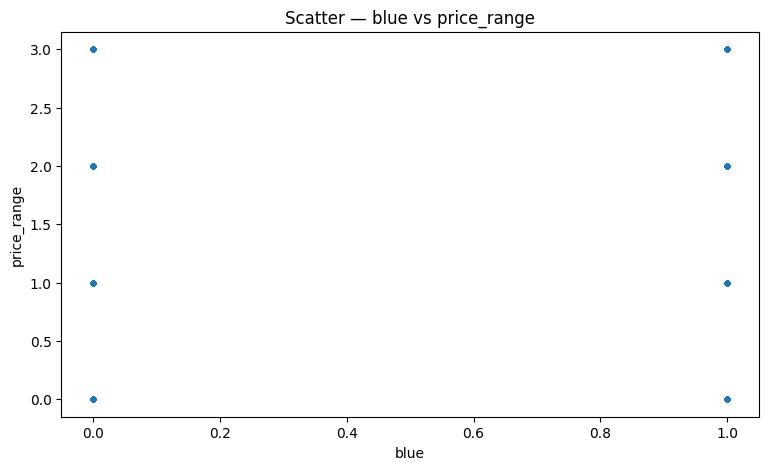

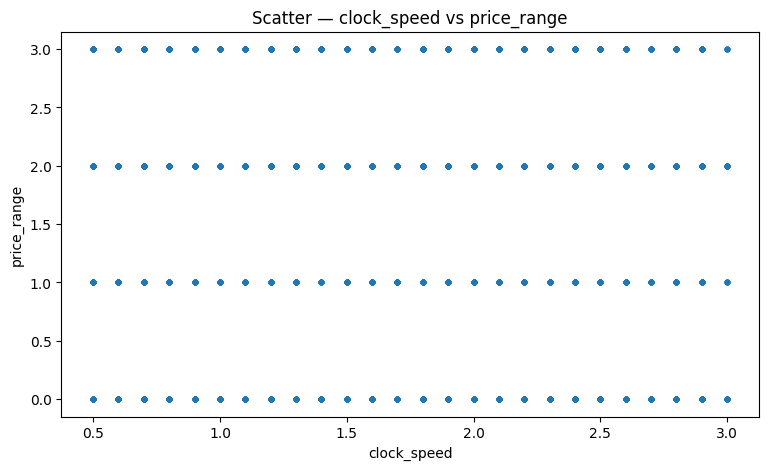

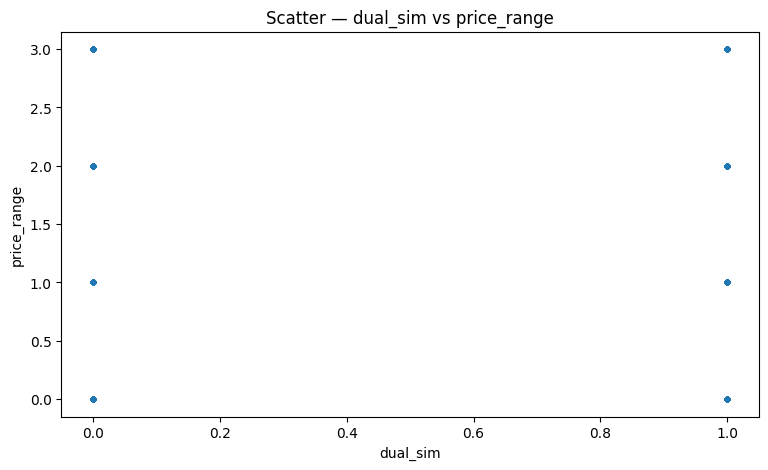

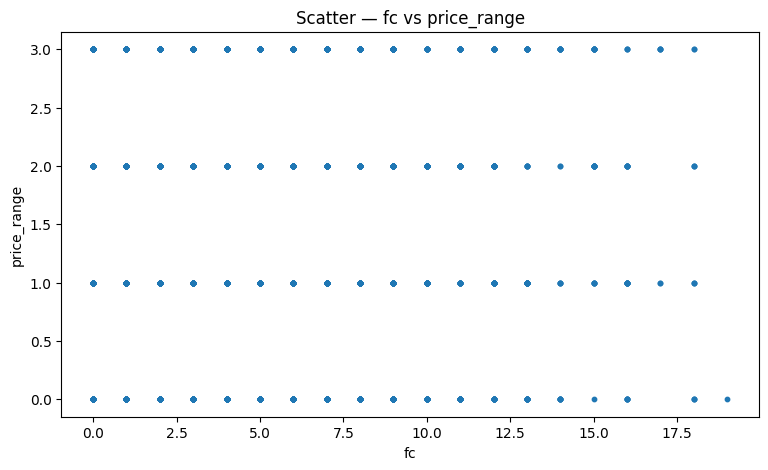

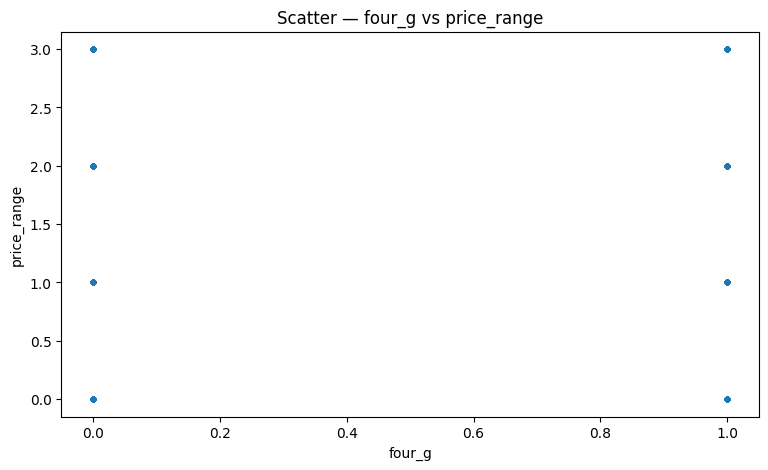

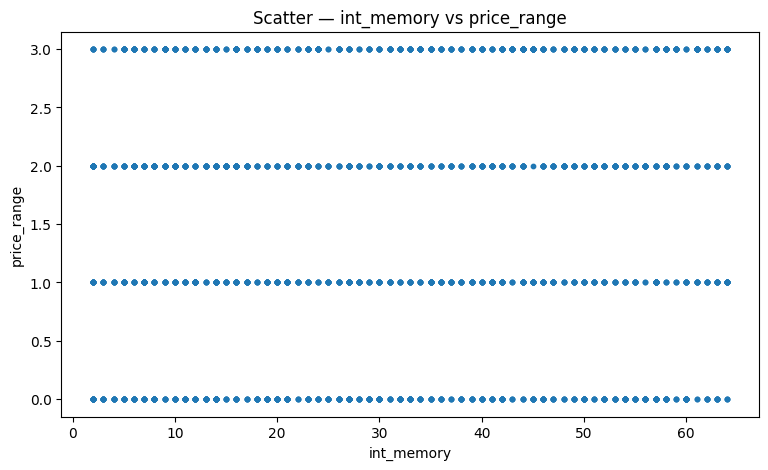

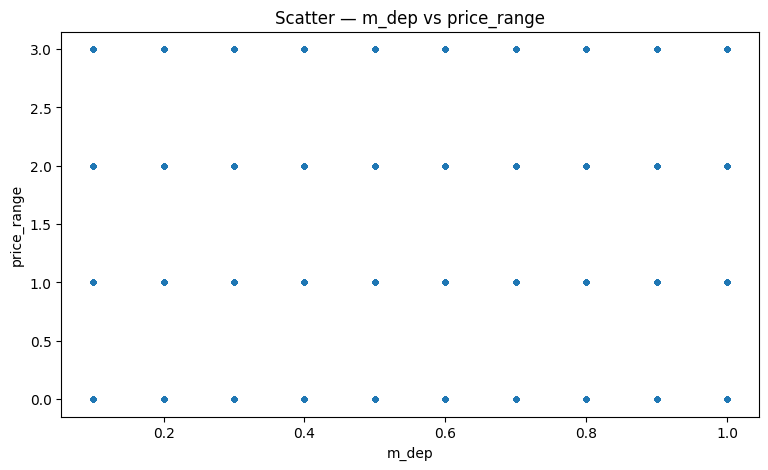

<Figure size 900x500 with 0 Axes>

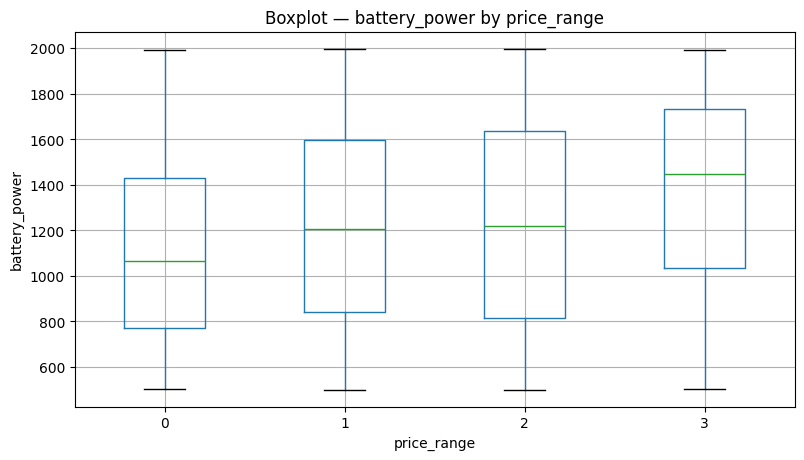

<Figure size 900x500 with 0 Axes>

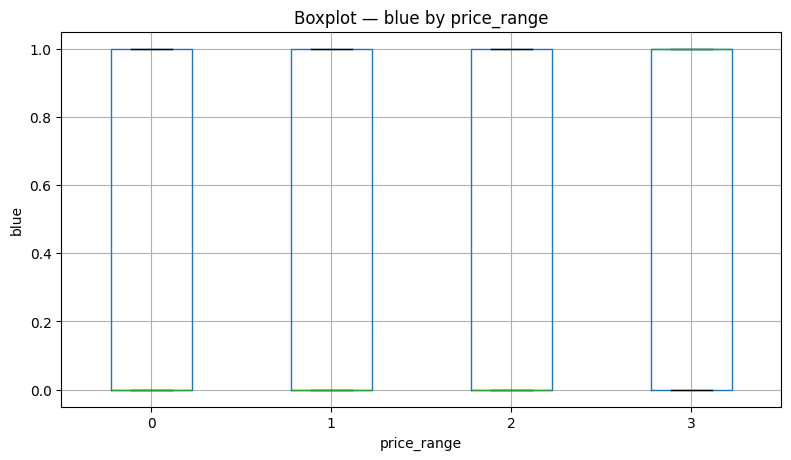

<Figure size 900x500 with 0 Axes>

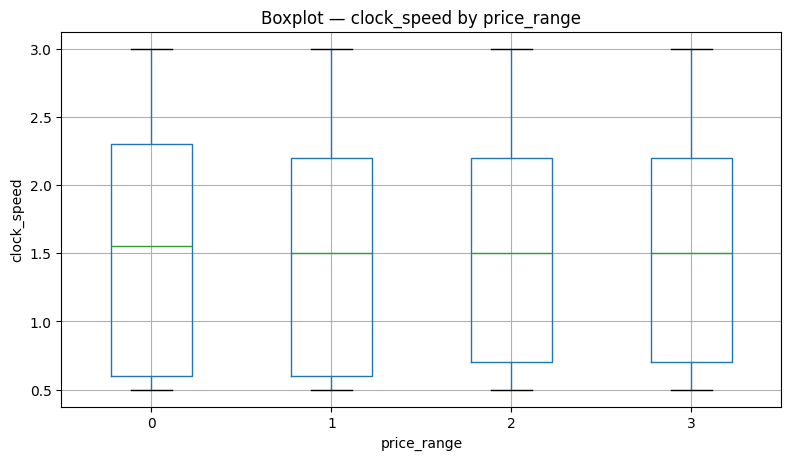

<Figure size 900x500 with 0 Axes>

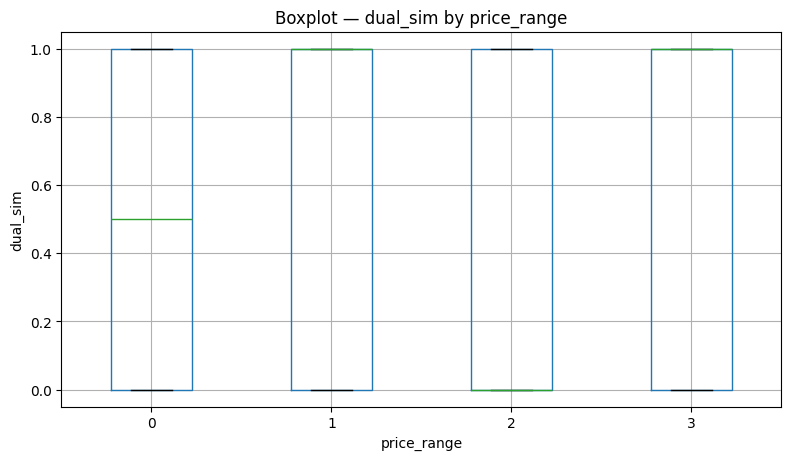

<Figure size 900x500 with 0 Axes>

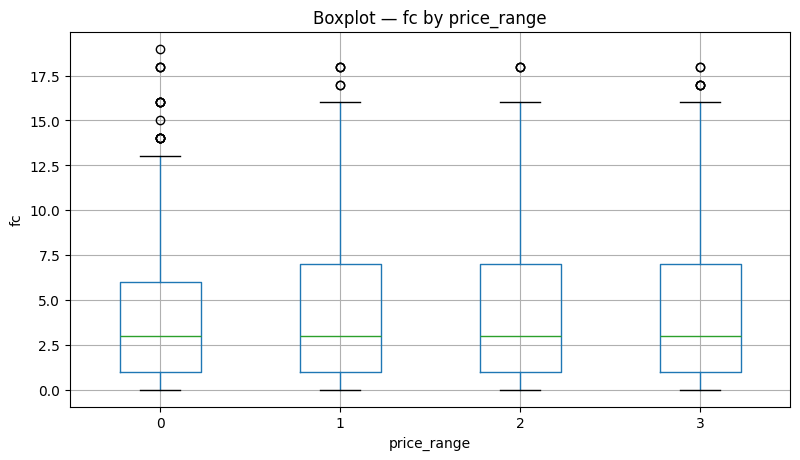

<Figure size 900x500 with 0 Axes>

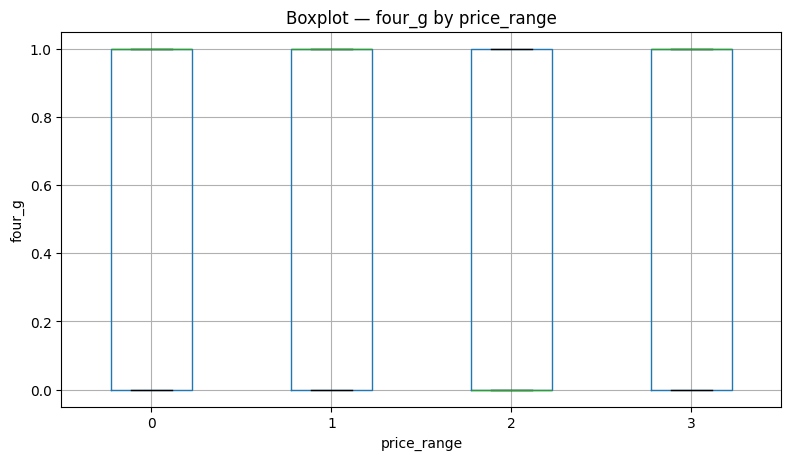

<Figure size 900x500 with 0 Axes>

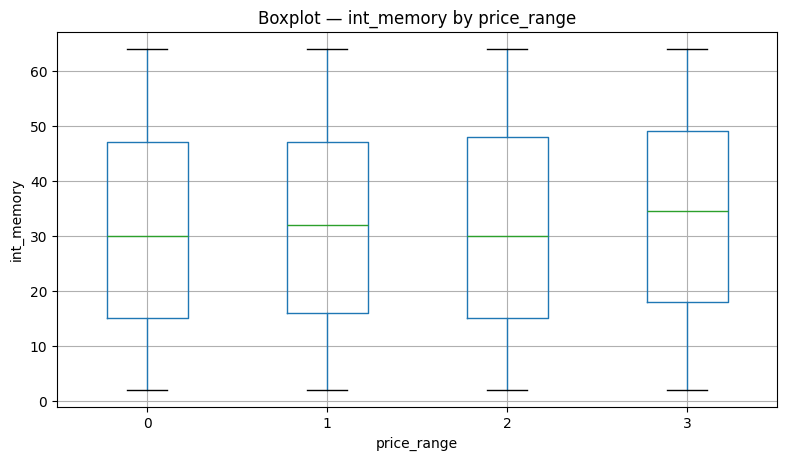

<Figure size 900x500 with 0 Axes>

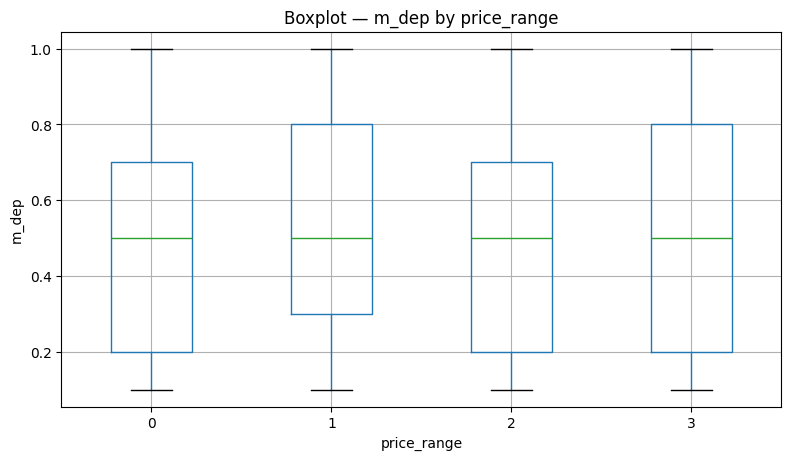

In [8]:

to_plot = num_cols[:8]
for c in to_plot:
    plt.figure()
    df[c].dropna().hist(bins=30)
    plt.title(f"Histogram — {c}")
    plt.xlabel(c); plt.ylabel("Frequency"); plt.show()

if target and target in df.columns and pd.api.types.is_numeric_dtype(df[target]):
    for c in to_plot:
        plt.figure()
        plt.scatter(df[c], df[target], s=10)
        plt.title(f"Scatter — {c} vs {target}")
        plt.xlabel(c); plt.ylabel(target); plt.show()

if target and target in df.columns and pd.api.types.is_numeric_dtype(df[target]):
    for c in to_plot:
        plt.figure()
        df.boxplot(column=c, by=target)
        plt.title(f"Boxplot — {c} by {target}")
        plt.suptitle("")
        plt.xlabel(target); plt.ylabel(c)
        plt.show()


In [9]:

adv_rows = []
for col in num_cols:
    s = df[col].dropna().values
    if len(s) > 10:

        try:
            k2, p_norm = stats.normaltest(s)
        except Exception:
            k2, p_norm = (np.nan, np.nan)


        p_levene = np.nan
        if target and pd.api.types.is_numeric_dtype(df[target]):
            mid = df[target].median()
            g_low = df.loc[df[target] <= mid, col].dropna().values
            g_high = df.loc[df[target] >  mid, col].dropna().values
            if len(g_low) > 10 and len(g_high) > 10:
                try:
                    W, p_levene = stats.levene(g_low, g_high, center='median')
                except Exception:
                    p_levene = np.nan

        adv_rows.append((col, k2, p_norm, p_levene))

adv_df = pd.DataFrame(adv_rows, columns=["feature", "dagostino_K2", "p_normality", "levene_pvar_equal"])
print("Advanced SciPy summary (normality per feature + Levene low/high classes):")
display(adv_df.sort_values("p_normality").head(15))


Advanced SciPy summary (normality per feature + Levene low/high classes):


,feature,dagostino_K2,p_normality,levene_pvar_equal
0,battery_power,2000.864611,0.000000e+00,0.067094
1,blue,7165.804051,0.000000e+00,0.654883
2,clock_speed,10032.602705,0.000000e+00,0.021576
3,dual_sim,7170.460721,0.000000e+00,0.687448
5,four_g,7197.252248,0.000000e+00,0.964319
6,int_memory,1854.369805,0.000000e+00,0.449722
7,m_dep,3584.428964,0.000000e+00,0.766922
8,mobile_wt,1759.293410,0.000000e+00,0.054749
14,sc_h,1490.018466,0.000000e+00,0.975468
9,n_cores,2114.116140,0.000000e+00,0.871066


## 8) Insight Synthesis and Conclusion

- **Key Determinants:**  
  From ANOVA and Pearson correlations, features such as **RAM**, **battery_power**, and **px_height/px_width** show the strongest association with `price_range`.  
  This means these features are the most influential in distinguishing mobile price categories.

- **Distribution Insights:**  
  Many features show skewed or non-normal distributions (confirmed by skewness, kurtosis, and SciPy normality tests).  
  This is expected in real-world datasets where features like RAM or battery capacity are not evenly distributed.

- **Group Differences:**  
  Boxplots reveal clear separations for RAM across price categories, while other features overlap more (e.g., talk_time or clock_speed).  
  Levene tests confirm that some features have significantly different variances between low- and high-price phones.

- **Unexpected Findings:**  
  Some features (like `blue`, `dual_sim`, or `three_g`) may not significantly influence price, as shown by high p-values in hypothesis tests.  
  This suggests that performance-related specs (RAM, resolution, battery) are much stronger predictors than binary connectivity features.

- **Overall Conclusion:**  
  Statistical analysis confirms that **hardware capacity (RAM, battery, resolution)** is the key driver of mobile phone pricing.  
  These insights can directly inform feature selection for classification models in the next stage of the project.
